In [1]:
# 🌤️ Weather App using OpenWeatherMap API

import requests

def get_weather(city_name, api_key):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city_name,
        "appid": api_key,
        "units": "metric"
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        city = data["name"]
        temp = data["main"]["temp"]
        desc = data["weather"][0]["description"]
        humidity = data["main"]["humidity"]
        wind = data["wind"]["speed"]

        print(f"✅ Weather in {city}:")
        print(f"🌡️ Temperature: {temp}°C")
        print(f"☁️ Condition: {desc}")
        print(f"💧 Humidity: {humidity}%")
        print(f"💨 Wind Speed: {wind} m/s")
    else:
        print("❌ City not found or API error.")

# 👇 Change this to your actual API key
api_key = "c304d195c0aafa3894debdb8cba05423"

# Ask user for city
city = input("Enter a city name: ")
get_weather(city, api_key)


Enter a city name: japan
✅ Weather in Japan:
🌡️ Temperature: 20.47°C
☁️ Condition: broken clouds
💧 Humidity: 51%
💨 Wind Speed: 9.26 m/s


📍 Detected Location: Las Vegas
Press Enter to use detected city (Las Vegas) or type a different one: 
Enter city name: 
🌤️ Current Weather:
City: Hyderabad
Temperature (°C): 30.23
Description: haze
Humidity (%): 54
Wind Speed (m/s): 5.14

📅 5-Day Forecast (every 3 hours):
              DateTime  Temp (°C)           Weather
0  2025-04-10 06:00:00      32.04        few clouds
1  2025-04-10 09:00:00      35.42        few clouds
2  2025-04-10 12:00:00      33.81  scattered clouds
3  2025-04-10 15:00:00      32.10   overcast clouds
4  2025-04-10 18:00:00      29.83   overcast clouds
5  2025-04-10 21:00:00      28.07     broken clouds
6  2025-04-11 00:00:00      27.32     broken clouds
7  2025-04-11 03:00:00      30.11        few clouds
8  2025-04-11 06:00:00      36.22        few clouds
9  2025-04-11 09:00:00      38.97         clear sky


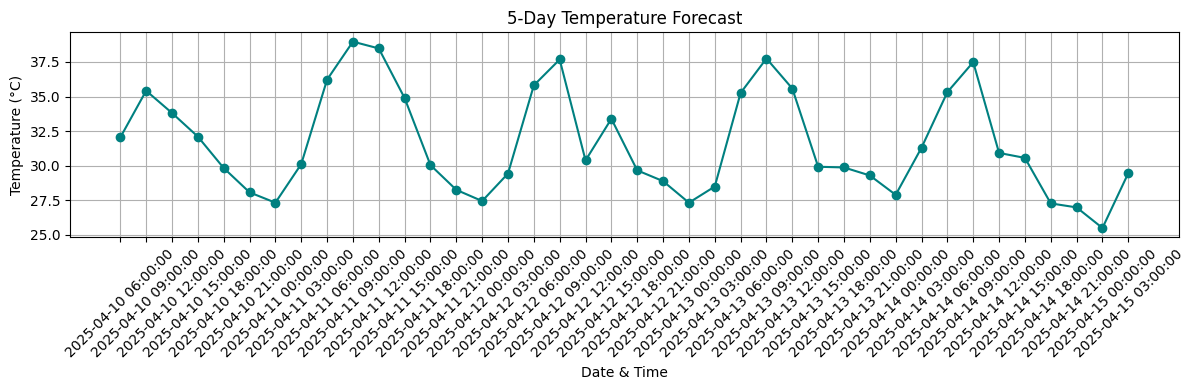

✅ Forecast data saved as 'forecast_output.csv'


In [4]:
# 🌤️ Enhanced Weather App in Google Colab

import requests
import pandas as pd
import matplotlib.pyplot as plt

# ----------- CONFIG -----------

def detect_city_by_ip():
    try:
        response = requests.get("https://ipinfo.io/json")
        if response.status_code == 200:
            location = response.json()
            return location.get("city", "Unknown")
        else:
            return "Unknown"
    except:
        return "Unknown"

# 🔑 Your OpenWeatherMap API key
api_key = "c304d195c0aafa3894debdb8cba05423"  # Replace with your key

# 🌍 Try to auto-detect location first
auto_city = detect_city_by_ip()
print(f"📍 Detected Location: {auto_city}")

# 📝 Ask user to confirm or change it
city = input(f"Press Enter to use detected city ({auto_city}) or type a different one: ") or auto_city

CITY = input("Enter city name: ") or "Hyderabad"

# ----------- CURRENT WEATHER -----------
def get_current_weather(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        current = {
            "City": data["name"],
            "Temperature (°C)": data["main"]["temp"],
            "Description": data["weather"][0]["description"],
            "Humidity (%)": data["main"]["humidity"],
            "Wind Speed (m/s)": data["wind"]["speed"]
        }
        return current
    else:
        return {"Error": "City not found or API error."}

# ----------- 5-DAY FORECAST -----------
def get_forecast(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    forecast_data = []
    if response.status_code == 200:
        data = response.json()
        for entry in data["list"]:
            forecast_data.append({
                "DateTime": entry["dt_txt"],
                "Temp (°C)": entry["main"]["temp"],
                "Weather": entry["weather"][0]["description"]
            })
    return pd.DataFrame(forecast_data)

# ----------- PLOT -----------
def plot_forecast(df):
    plt.figure(figsize=(12, 4))
    plt.plot(df["DateTime"], df["Temp (°C)"], marker='o', color='teal')
    plt.xticks(rotation=45)
    plt.title("5-Day Temperature Forecast")
    plt.xlabel("Date & Time")
    plt.ylabel("Temperature (°C)")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# ----------- MAIN -----------
# Get and display current weather
current_weather = get_current_weather(CITY, API_KEY)
print("🌤️ Current Weather:")
for k, v in current_weather.items():
    print(f"{k}: {v}")

# Get and show forecast
forecast_df = get_forecast(CITY, API_KEY)
print("\n📅 5-Day Forecast (every 3 hours):")
print(forecast_df.head(10))

# Plot chart
plot_forecast(forecast_df)

# Export to CSV
forecast_df.to_csv("forecast_output.csv", index=False)
print("✅ Forecast data saved as 'forecast_output.csv'")
